In [15]:
import survey
import thinkstats
import math

### Excercise 1-3

##### 1. 아래 코드 실행

In [2]:

table =survey.Pregnancies()
table.ReadRecords()

In [3]:
print('Number of pregenancies', len(table.records))

Number of pregenancies 13593


In [4]:
table.records[0]

##### 2. 정상 출산된 아이수를 계산

In [5]:
from collections import Counter
dict_outcome = Counter(p.outcome for p in table.records)
dict_outcome

Counter({1: 9148, 2: 1862, 3: 120, 4: 1921, 5: 190, 6: 352})

In [6]:
print('정상 출산된 아이수 : ', dict_outcome[1])

정상 출산된 아이수 :  9148


In [7]:
list_normal_outcome = [p for p in table.records if p.outcome == 1]
len(list_normal_outcome)

9148

##### 3. 정상 출산된 아이들을 첫아이와 그외의 아이 그룹으로 나누어서 확인

In [8]:
list_normal_outcome_first = [p for p in list_normal_outcome if p.birthord == 1]
len(list_normal_outcome_first)

4413

In [9]:
list_normal_outcome_others = [p for p in list_normal_outcome if p.birthord != 1]
len(list_normal_outcome_others)

4735

In [10]:
len(list_normal_outcome_first) + len(list_normal_outcome_others)

9148

##### 4. 첫아이를 임신했을  때의 평균 임신 기간과 그 외 아이를 임신했을 때의  평균을 비교

In [11]:
def get_average_prglength(pregnancies):
    sum_prg = sum(p.prglength for p in pregnancies)
    return sum_prg / len(pregnancies)

In [12]:
get_average_prglength(list_normal_outcome_first)

38.60095173351461

In [13]:
get_average_prglength(list_normal_outcome_others)

38.52291446673706

### Excercise 2-2

##### 첫 아이 임신 기간의 표준편차와 둘째 이후 아이 임신 기간의 표준편차를 계산

In [16]:
def get_stdev(t):
    mu, var = thinkstats.MeanVar(t)
    return math.sqrt(var)

In [17]:
get_stdev([p.prglength for p in list_normal_outcome_first])

2.7915850698243654

In [18]:
get_stdev([p.prglength for p in list_normal_outcome_others])

2.6155761106844913

#### Histogram

In [20]:
import Pmf
hist= Pmf.MakeHistFromList([1,2,2,3,5])
hist

In [21]:
hist.Freq(2)

2

In [22]:
hist.Freq(4)

0

In [23]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [24]:
sorted(hist.Values())

[1, 2, 3, 5]

In [25]:
hist.Items()

dict_items([(1, 1), (2, 2), (3, 1), (5, 1)])

### Excercise 2-3

최빈값(`mode`)를 찾는 감수를 작성하세요.

In [30]:
def get_all_modes(t):
    hist = Pmf.MakeHistFromList(t)
    return sorted(hist.Items(), key=lambda x: x[1], reverse=True)

def get_mode(t):
    return get_all_modes(t)[0][1]

In [31]:
get_mode([1,2,2,3,5])

2

#### 히스토그램 그리기

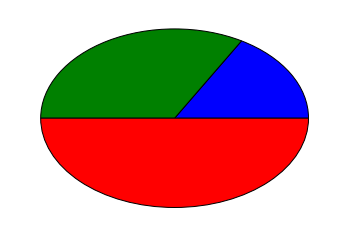

In [32]:
import matplotlib.pyplot as pyplot
pyplot.pie([1,2,3])
pyplot.show()

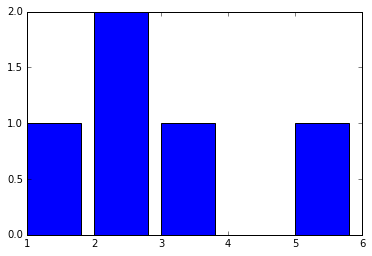

In [34]:
vals, freqs = hist.Render()
rectangles = pyplot.bar(vals, freqs)
pyplot.show()